In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wandb
import numpy as np
wandb.login()

/Users/sizhuang/Desktop/GitHub Repos/IterativeMethods/iterENV/lib/python3.8/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
/Users/sizhuang/Desktop/GitHub Repos/IterativeMethods/iterENV/lib/python3.8/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
wandb: Currently logged in as: sizhuang. Use `wandb login --relogin` to force relogin


True

In [2]:
sweep_ids = []

In [ ]:
def get_metrics(sweep_id, noise_level):
    api = wandb.Api()
    sweep_path = "sizhuang/IterativeMethods/" + sweep_id
    sweep = api.sweep(sweep_path)
    sweep_runs = sweep.runs
    num_runs = len(sweep_runs)

    summary_list, config_list, name_list = [], [], []
    for run in sweep_runs: 
    # .summary contains the output keys/values 
    #  for metrics such as accuracy.
    #  We call ._json_dict to omit large files 
        summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
        config_list.append(
        {k: v for k,v in run.config.items()
         if not k.startswith('_')})

    # .name is the human-readable name of the run.
        name_list.append(run.name)
        runs_df = pd.DataFrame({
            "summary": summary_list,
            "config": config_list,
            "name": name_list
        })

    test_accuracies = [item['test_accuracy'] for item in runs_df.summary]
    num_iters = [item['num_iter_layers'] for item in runs_df.config]
    noise = noise_level/10
    noises = np.full(num_runs, noise)
    assert len(test_accuracies)  == num_runs
    assert len(num_iters) == num_runs

    api.flush()
    return test_accuracies, num_iters, noises
    

In [ ]:
test_accuracies = []
num_iters = []
noises = []

for noise_level, sweep_id in enumerate(sweep_ids):
    ta, ni, n = get_metrics(sweep_id, noise_level)
    test_accuracies.extend(ta)
    num_iters.extend(ni)
    noises.extend(n)

In [4]:
data = pd.DataFrame({
    "test accuracy": test_accuracies,
    "number of iterations": num_iters,
    "noise level": noises
})


<Axes: xlabel='num_iterations', ylabel='test_accuracy'>

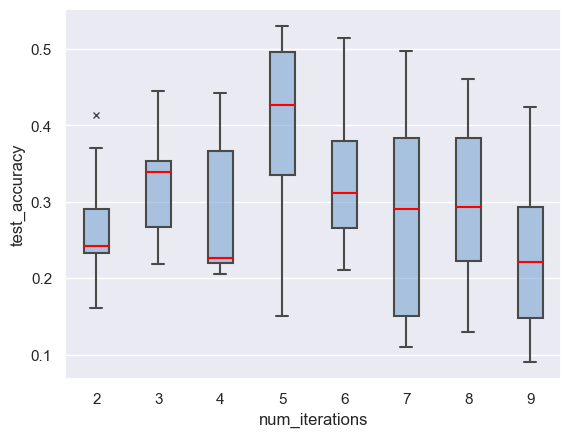

In [5]:
import seaborn as sns
sns.set(style="darkgrid")
sns.boxplot(x='number of iterations',
            y="test accuracy",
            hue="noise level",
            data=data, 
            width=0.4,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "red"}
            )